In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/privheifacultystudratio20122013.csv")
df = df.dropna()

In [5]:
df

,region,higher_education_institution,number_of_students,number_of_faculty,faculty_student_ratio
0,Region I,The Adelphi College,405,26,1 is to 16
1,Region I,Malasiqui Agno Valley College,450,31,1 is to 15
2,Region I,Agoo Computer College Philippines,56,14,1 is to 4
3,Region I,Asbury College,357,11,1 is to 32
4,Region I,Asia Career College Foundation,212,15,1 is to 14
...,...,...,...,...,...
1597,Region IV-B,ACLC College of Calapan,201,19,1 is to 11
1598,Region IV-B,Pinamalayan Maritime Foundation and Technologi...,365,22,1 is to 17
1599,Region IV-B,STI College-Puerto Princesa,139,15,1 is to 9
1600,Region IV-B,Remnant Christian College-Palawan,ND,8,ND


In [4]:
df.shape

(1602, 5)

In [7]:
df[df["higher_education_institution"].str.contains("Philippines")].head()

,region,higher_education_institution,number_of_students,number_of_faculty,faculty_student_ratio
2,Region I,Agoo Computer College Philippines,56,14,1 is to 4
9,Region I,Data Center College of the Philippines-Laoag City,1224,56,1 is to 22
23,Region I,"Northern Philippines College for Maritime, Sci...",2896,87,1 is to 33
27,Region I,Panpacific University North Philippines-Urdane...,6689,194,1 is to 34
55,Region I,Data Center College of the Philippines-Vigan City,197,11,1 is to 18


In [8]:
df.dtypes

region                          object
higher_education_institution    object
number_of_students              object
number_of_faculty               object
faculty_student_ratio           object
dtype: object

In [9]:
df.tail()

,region,higher_education_institution,number_of_students,number_of_faculty,faculty_student_ratio
1597,Region IV-B,ACLC College of Calapan,201,19,1 is to 11
1598,Region IV-B,Pinamalayan Maritime Foundation and Technologi...,365,22,1 is to 17
1599,Region IV-B,STI College-Puerto Princesa,139,15,1 is to 9
1600,Region IV-B,Remnant Christian College-Palawan,ND,8,ND
1601,Region IV-B,Luna Goco College-Roxas,4,6,1 is to 1


In [10]:
df["number_of_faculty"] = pd.to_numeric(df["number_of_faculty"], errors='coerce')
df["number_of_students"] = pd.to_numeric(df["number_of_students"], errors='coerce')

In [11]:
df.tail()

,region,higher_education_institution,number_of_students,number_of_faculty,faculty_student_ratio
1597,Region IV-B,ACLC College of Calapan,201.0,19.0,1 is to 11
1598,Region IV-B,Pinamalayan Maritime Foundation and Technologi...,365.0,22.0,1 is to 17
1599,Region IV-B,STI College-Puerto Princesa,139.0,15.0,1 is to 9
1600,Region IV-B,Remnant Christian College-Palawan,NaN,8.0,ND
1601,Region IV-B,Luna Goco College-Roxas,4.0,6.0,1 is to 1


In [12]:
df = df.dropna()
df.tail()

,region,higher_education_institution,number_of_students,number_of_faculty,faculty_student_ratio
1596,Region IV-B,Philippine Central Islands College Foundation,136.0,20.0,1 is to 7
1597,Region IV-B,ACLC College of Calapan,201.0,19.0,1 is to 11
1598,Region IV-B,Pinamalayan Maritime Foundation and Technologi...,365.0,22.0,1 is to 17
1599,Region IV-B,STI College-Puerto Princesa,139.0,15.0,1 is to 9
1601,Region IV-B,Luna Goco College-Roxas,4.0,6.0,1 is to 1


In [13]:
df.shape

(1556, 5)

Text(0, 0.5, 'Frequency')

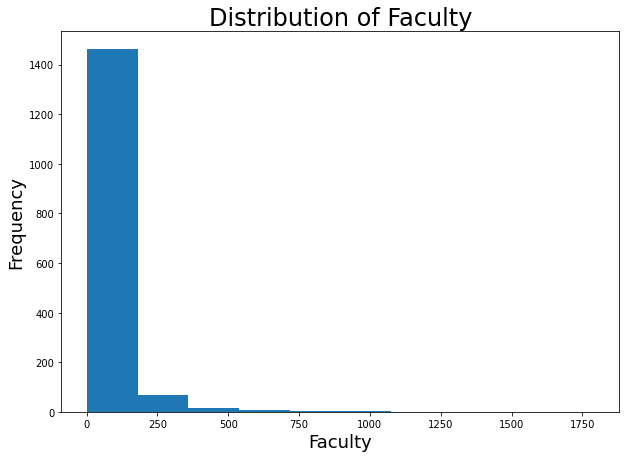

In [14]:
df["number_of_faculty"].plot(kind='hist',figsize=(10,7))
plt.title('Distribution of Faculty', size=24)
plt.xlabel('Faculty', size=18)
plt.ylabel('Frequency', size=18)


Text(0, 0.5, 'Frequency')

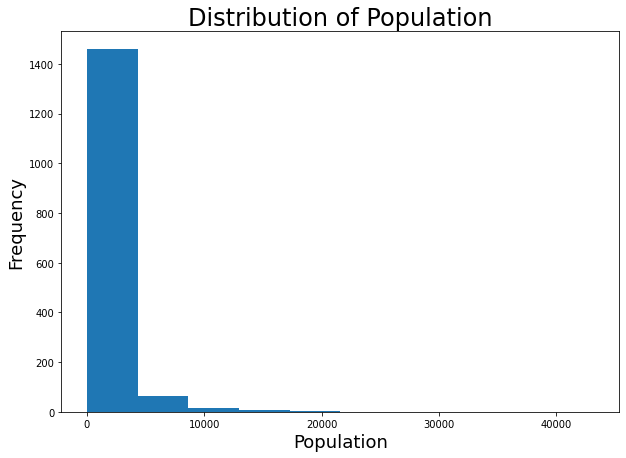

In [15]:
df["number_of_students"].plot(kind='hist',figsize=(10,7))
plt.title('Distribution of Population', size=24)
plt.xlabel('Population', size=18)
plt.ylabel('Frequency', size=18)

<AxesSubplot:>

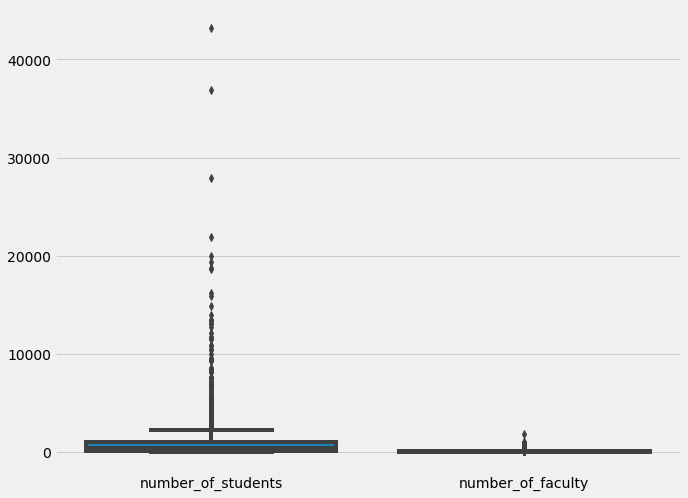

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.boxplot(data = df)

Text(0.5, 1.0, 'Number of Faculty by Students')

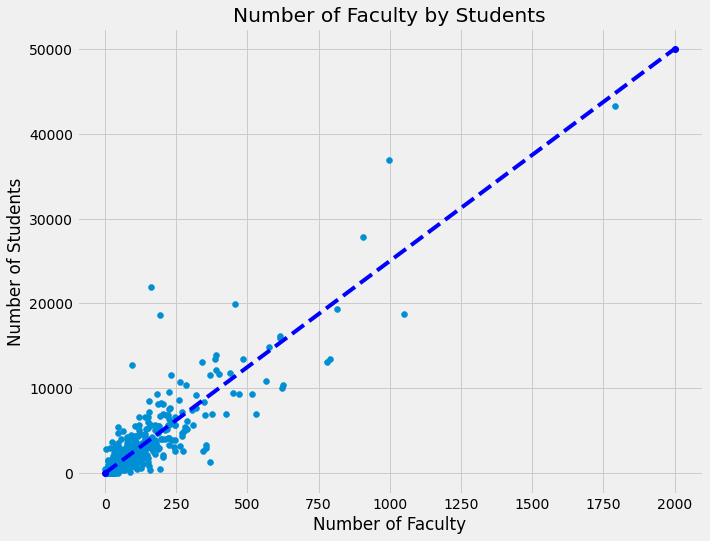

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df["number_of_faculty"], df["number_of_students"])
plt.plot([0, 2000], [0, 50000], '--bo')
plt.xlabel("Number of Faculty")
plt.ylabel("Number of Students")
plt.title("Number of Faculty by Students")

In [18]:
df.describe()

,number_of_students,number_of_faculty
count,1556.000000,1556.000000
mean,1197.143316,55.192802
std,2725.469181,100.663746
min,0.000000,1.000000
25%,134.000000,16.000000
50%,386.500000,26.000000
75%,995.250000,47.000000
max,43221.000000,1791.000000


In [19]:
from sklearn.linear_model import LinearRegression

X = df[["number_of_faculty"]]

In [20]:
X.head()

,number_of_faculty
0,26.0
1,31.0
2,14.0
3,11.0
4,15.0


In [21]:
linear_model = LinearRegression()
linear_model.fit(X, df["number_of_students"])

LinearRegression()

In [22]:
print(f"Coefficient values{linear_model.coef_}")

Coefficient values[24.32509776]


In [23]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))

,0,1
0,number_of_faculty,24.325098


In [24]:
predictions = linear_model.predict(X)

In [25]:
df["PRED"] = predictions

<ipython-input-25-81110d4b94fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PRED"] = predictions


In [26]:
df[["higher_education_institution", "number_of_faculty", "number_of_students", "PRED"]]

,higher_education_institution,number_of_faculty,number_of_students,PRED
0,The Adelphi College,26.0,405.0,487.025552
1,Malasiqui Agno Valley College,31.0,450.0,608.651041
2,Agoo Computer College Philippines,14.0,56.0,195.124379
3,Asbury College,11.0,357.0,122.149086
4,Asia Career College Foundation,15.0,212.0,219.449477
...,...,...,...,...
1596,Philippine Central Islands College Foundation,20.0,136.0,341.074966
1597,ACLC College of Calapan,19.0,201.0,316.749868
1598,Pinamalayan Maritime Foundation and Technologi...,22.0,365.0,389.725161
1599,STI College-Puerto Princesa,15.0,139.0,219.449477


In [30]:
df[df["higher_education_institution"].str.contains("San")]

,region,higher_education_institution,number_of_students,number_of_faculty,faculty_student_ratio,PRED
34,Region I,Saint Louis College-San Fernando City,5066.0,176.0,1 is to 29,4135.790216
37,Region I,San Carlos College,648.0,54.0,1 is to 12,1168.128290
50,Region I,"STI College-San Fernando City, La Union",656.0,18.0,1 is to 36,292.424770
56,Region I,Colegio San Jose De Alaminos,103.0,19.0,1 is to 5,316.749868
80,Region I,PIMSAT Colleges-San Carlos City,158.0,11.0,1 is to 14,122.149086
...,...,...,...,...,...,...
1565,Region IV-B,Divine Word College of San Jose,1442.0,54.0,1 is to 27,1168.128290
1575,Region IV-B,San Francisco Javier College,225.0,17.0,1 is to 13,268.099673
1576,Region IV-B,Santa Cruz Institute,619.0,21.0,1 is to 29,365.400064
1577,Region IV-B,Seminario De San Jose,33.0,11.0,1 is to 3,122.149086


Text(0.5, 1.0, 'Actual vs Predicted Plot')

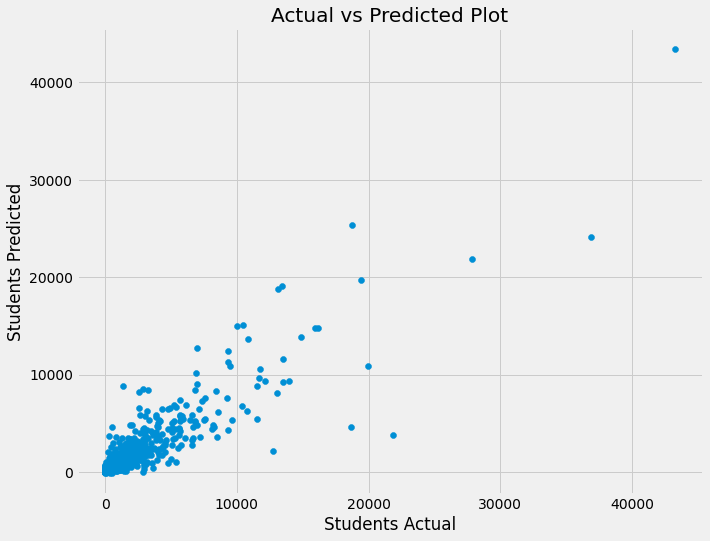

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df["number_of_students"], df["PRED"])
plt.xlabel("Students Actual")
plt.ylabel("Students Predicted")
plt.title("Actual vs Predicted Plot")

In [32]:
import math
mean_squared_error = np.mean((df["number_of_students"] - linear_model.predict(X))**2)
math.sqrt(mean_squared_error)

1196.38964022379

In [33]:
linear_model.score(X, df["number_of_students"])

0.807184503167262

In [ ]:
ax = sns.scatterplot(x="number_of_faculty", y="number_of_students", data=df)